# Linear Regression with Python and Seaborn

**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the Dataset**

In [3]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Data Cleaning and Preparation
We want to look at the MPG of cars and find there correlation since the name of the car has no value lets drop that

In [5]:
df.drop(["name"], axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary of the Dataset**

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Now lets drop the NA

In [7]:
df.isnull().sum() #show all nulls

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df[df.isnull().any(axis = 1)] #show all nulls as lines

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [9]:
df.dropna(inplace = True) #drop all null values
df.isnull().sum().any() #check the nulls


False

In [10]:
df.shape #show the shape 

(392, 8)

In [11]:
#use integer encoding to change the origen 

df["origin"] = df["origin"].astype('category')
origin_mapping = dict(enumerate(df['origin'].cat.categories))
print(origin_mapping)
df['origin'] = df['origin'].cat.codes
df

{0: 'europe', 1: 'japan', 2: 'usa'}


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,2
394,44.0,4,97.0,52.0,2130,24.6,82,0
395,32.0,4,135.0,84.0,2295,11.6,82,2
396,28.0,4,120.0,79.0,2625,18.6,82,2


<AxesSubplot: >

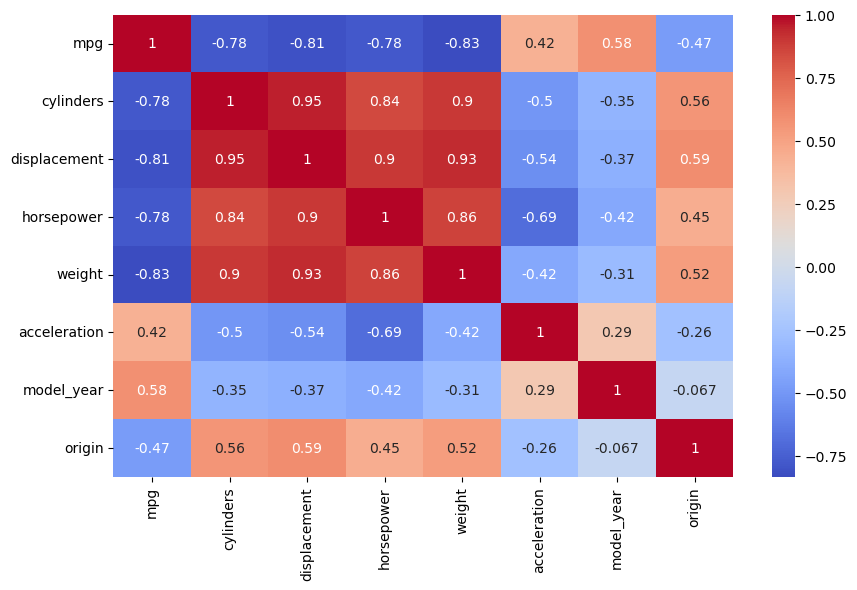

In [12]:
# Statistical summary
df.describe()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


## Simple Linear Regression: Predicting MPG

In [13]:
df.cylinders.unique() # show the unique values of the cylinders

array([8, 4, 6, 3, 5])

In [14]:
df.cylinders.value_counts() #show the counts

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

**Visualize**

/tmp/ipykernel_64171/349781917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["cylinders"], data = df, palette = "cubehelix")


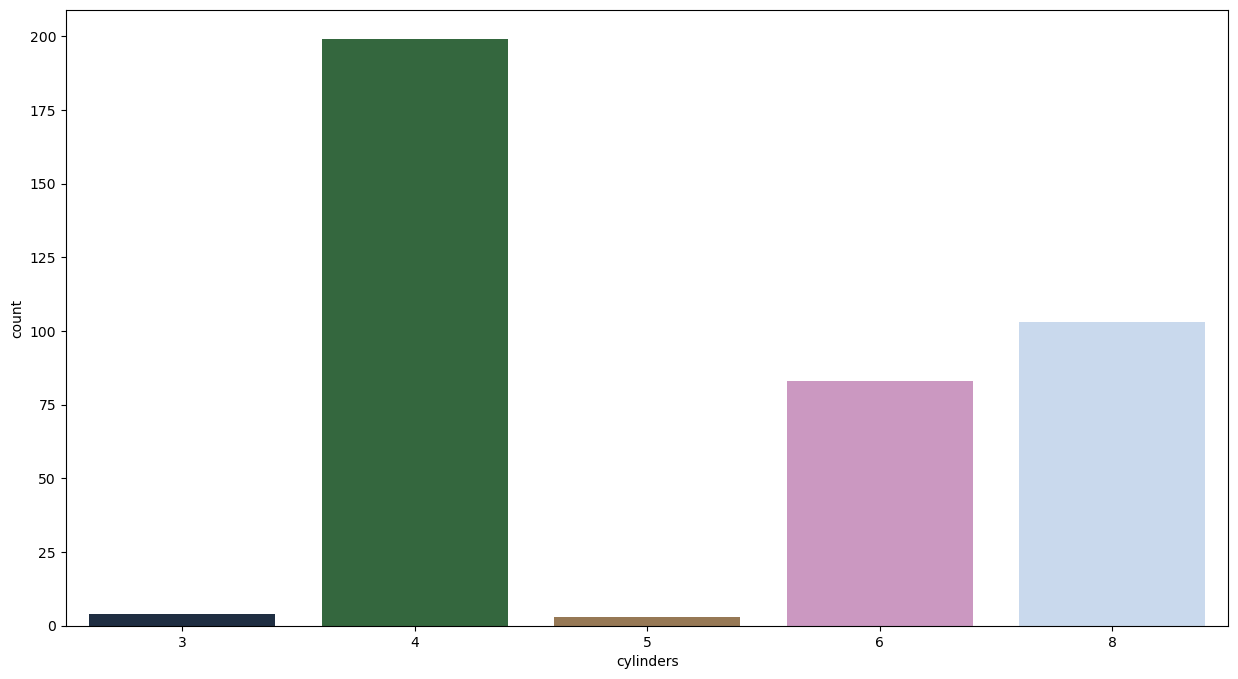

In [15]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["cylinders"], data = df, palette = "cubehelix")
plt.show()

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


In [17]:
df["model_year"] = (1900 + df.model_year)

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,2
1,15.0,8,350.0,165.0,3693,11.5,1970,2
2,18.0,8,318.0,150.0,3436,11.0,1970,2
3,16.0,8,304.0,150.0,3433,12.0,1970,2
4,17.0,8,302.0,140.0,3449,10.5,1970,2


/tmp/ipykernel_64171/3698679785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["model_year"], data = df, palette = "rainbow")


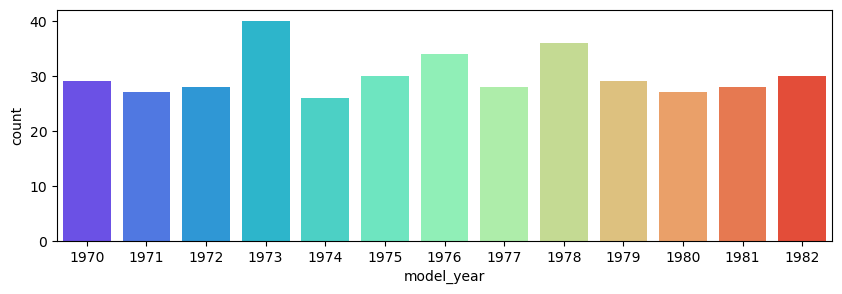

In [19]:
plt.figure(figsize = (10, 3))
sns.countplot(x = df["model_year"], data = df, palette = "rainbow")
plt.show()

/tmp/ipykernel_64171/67230556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["origin"], data = df, palette = "rainbow")


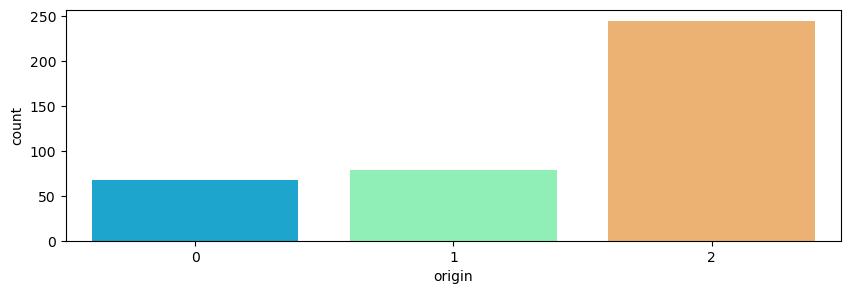

In [20]:
plt.figure(figsize = (10, 3))
sns.countplot(x=df["origin"], data = df, palette = "rainbow")
plt.show()

/tmp/ipykernel_64171/2453456051.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["horsepower"]) #distribution plot


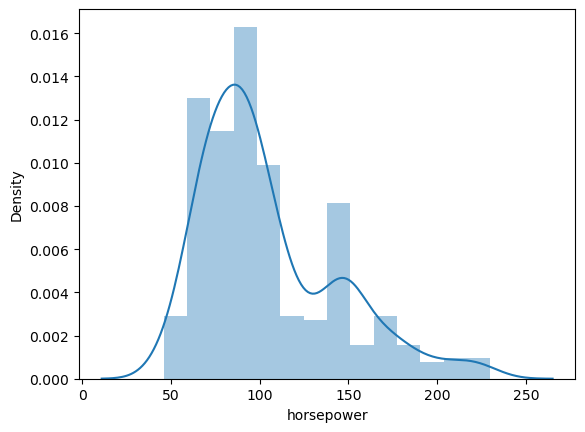

In [21]:
sns.distplot(df["horsepower"]) #distribution plot
plt.show()

/tmp/ipykernel_64171/1712932274.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["displacement"]) #distribution plot


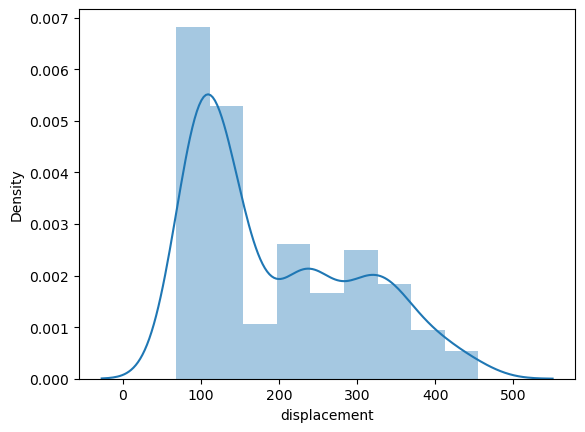

In [22]:
sns.distplot(df["displacement"]) #distribution plot
plt.show()

## Bivariate Analysis

/tmp/ipykernel_64171/3416863325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral")


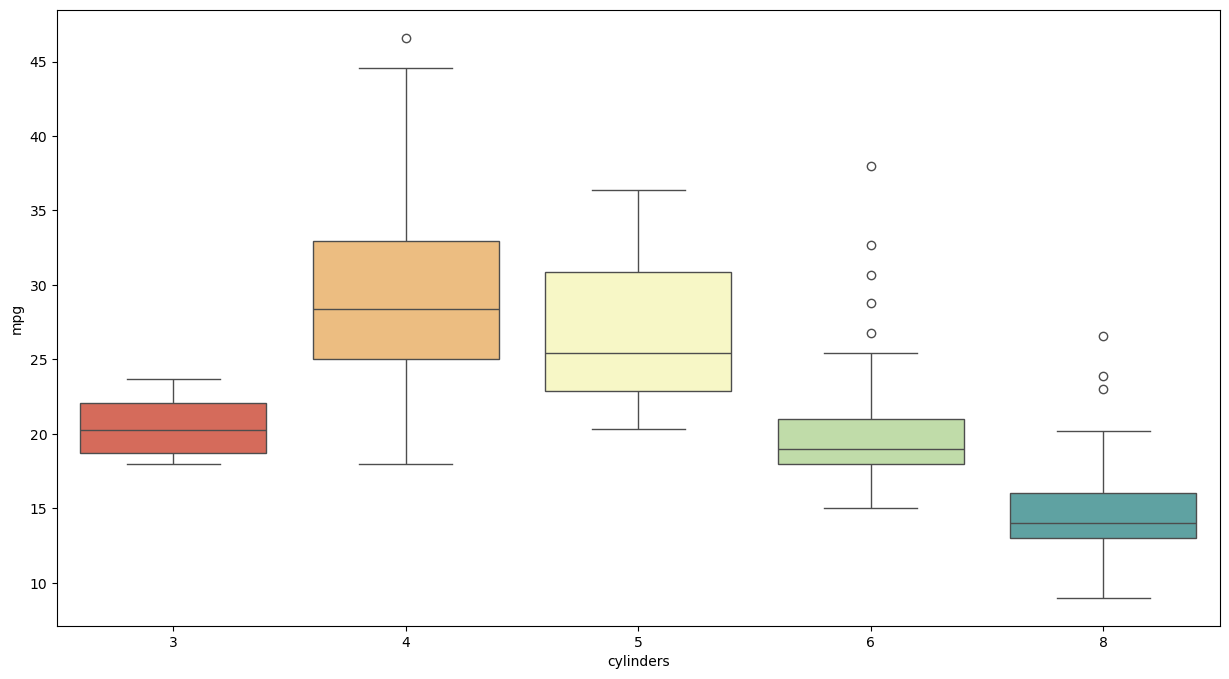

In [23]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral")
plt.show()

/tmp/ipykernel_64171/125626078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral")


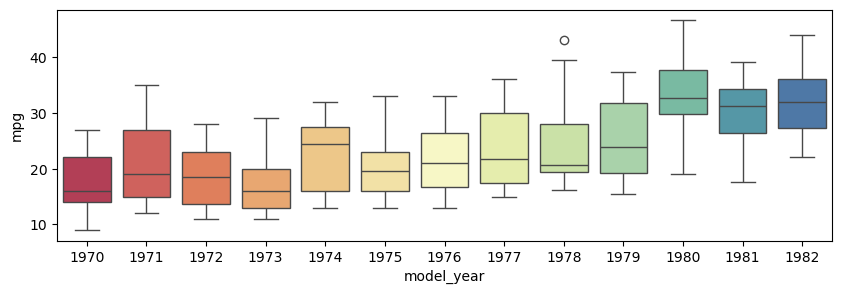

In [24]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral")
plt.show()

## Multivariate Analysis

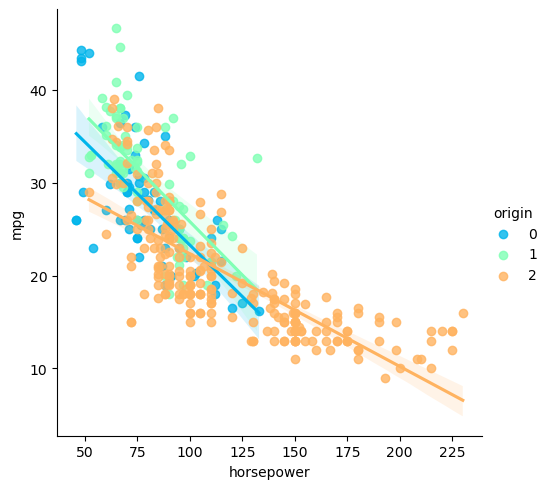

In [25]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
plt.show()

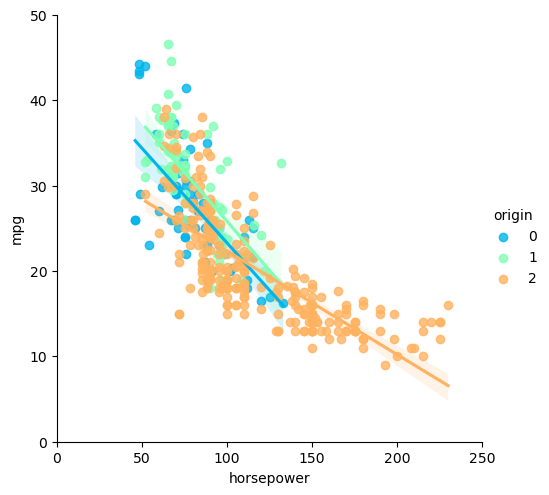

In [26]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (0, 250))
graph.set(ylim = (0, 50))
plt.show()

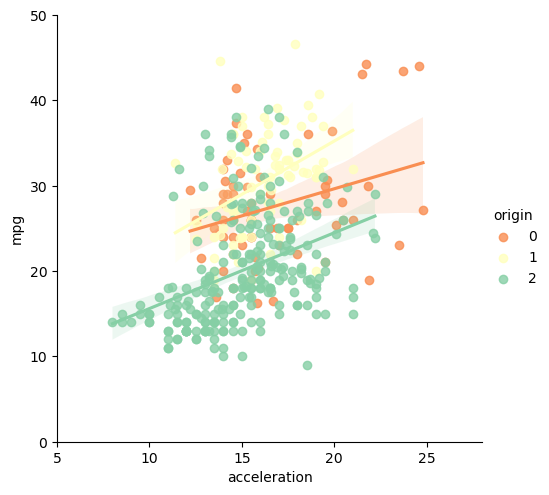

In [27]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df, palette = "Spectral")
graph.set(ylim = (0, 50))
graph.set(xlim = (5, 28))
plt.show()

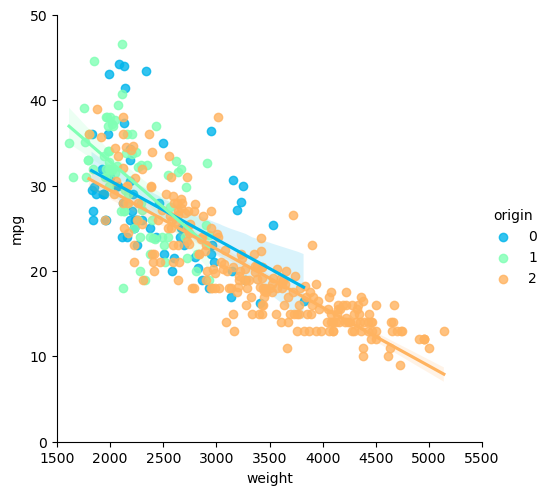

In [28]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(ylim = (0, 50))
graph.set(xlim = (1500, 5500))
plt.show()

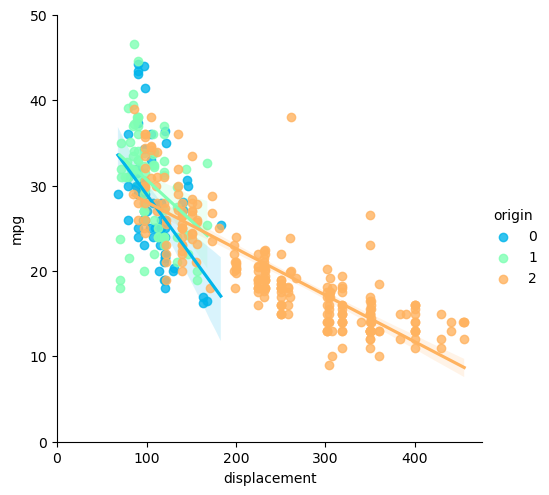

In [29]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(ylim = (0, 50))
graph.set(xlim = (0, 475))
plt.show()

## Heatmap of Correlation Matrix

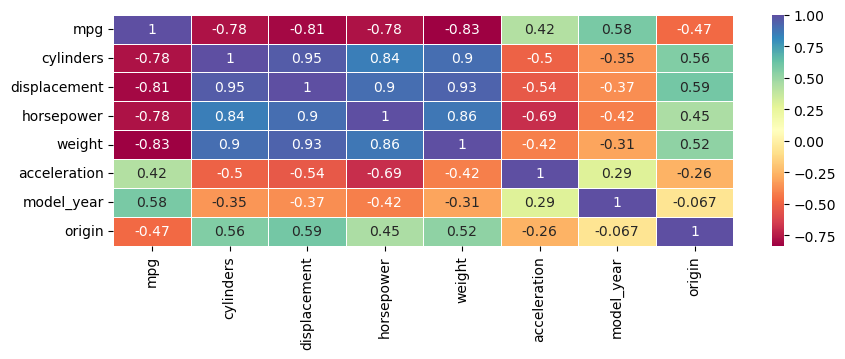

In [ ]:
plt.figure(figsize = (10, 3))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [31]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)

In [32]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,2
1,15.0,8,165.0,3693,1970,2
2,18.0,8,150.0,3436,1970,2
3,16.0,8,150.0,3433,1970,2
4,17.0,8,140.0,3449,1970,2


In [33]:
from datetime import datetime

In [34]:
today = datetime.today()

In [35]:
today

datetime.datetime(2025, 4, 29, 14, 47, 5, 373829)

In [36]:
this_year = today.year
this_year

2025

In [37]:
df["age"] = this_year - df.model_year

In [38]:
df["model_year"].unique()
#df.drop(["model_year"], axis = 1, inplace = True)

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982])

In [39]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,2,55
1,15.0,8,165.0,3693,1970,2,55
2,18.0,8,150.0,3436,1970,2,55
3,16.0,8,150.0,3433,1970,2,55
4,17.0,8,140.0,3449,1970,2,55


In [40]:
df.origin.unique()

array([2, 1, 0], dtype=int8)

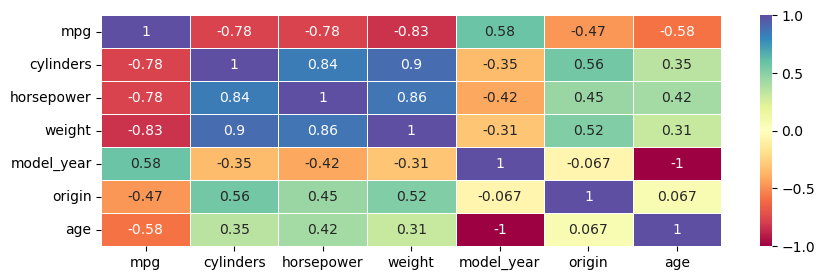

In [43]:
plt.figure(figsize = (10, 3))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()